In [1]:
import sys
import os

os.chdir("../")

os.getcwd()

'c:\\Users\\Gabi\\git\\meter_Hw4'

In [10]:
from data_preprocess import DataPreprocessing

In [11]:
preprocessor = DataPreprocessing()

data = preprocessor.load_data("Meter_A.txt")

         0         1         2         3          4          5         6   \
0  0.841499  1.009367  0.993816  8.469805  10.278727  10.037759  8.501365   
1  0.842250  1.006584  0.996605  7.531891   9.139924   8.951618  7.612213   
2  0.840723  1.011647  0.998152  6.641699   7.975464   7.857692  6.593117   
3  0.841119  1.017807  0.996812  5.687524   6.824334   6.689885  5.615428   
4  0.840358  1.016534  0.996221  5.660385   6.829560   6.675628  5.623977   

         7          8          9   ...         27         28         29  \
0  8.581726  10.247763  10.058822  ...  32.451173  34.568685  33.082683   
1  7.623325   9.106345   8.945142  ...  32.428385  34.441732  33.081055   
2  6.681572   7.964596   7.814698  ...  32.428385  34.275715  33.113605   
3  5.763315   6.801051   6.686639  ...  32.485350  34.080403  33.170573   
4  5.736818   6.813453   6.672377  ...  32.503255  34.122720  33.164062   

          30         31         32         33         34         35  36  
0  36.722005

In [7]:
type(data)

numpy.ndarray

## Data preprocessing

In [4]:
from sklearn.model_selection import train_test_split

In [8]:
train_validation, test = train_test_split(data, test_size = 0.2, random_state=12)

train, validation = train_test_split(train_validation, test_size = 0.2, random_state=99)

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler().fit(train[:, :-1])

train_scaled = scaler.transform(train[:, :-1])

In [11]:
# X_train = train[:, :-1]
Y_train = train[:, -1]

set(Y_train)

{1.0, 2.0}

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [14]:
dt_model.fit(X = train_scaled, y = train[:, -1])

DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [15]:
X_validation = scaler.transform(validation[:, :-1])
y_predicted = dt_model.predict(X_validation)

In [16]:
from sklearn.metrics import accuracy_score

In [17]:
accuracy_score(validation[:, -1], y_predicted)

0.9285714285714286

## We can create our child class model_builder.py based on this code

In [1]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
data

array([[ 0.84149871,  1.00936653,  0.99381601, ..., 35.174155  ,
        32.72949   ,  1.        ],
       [ 0.84225022,  1.00658369,  0.99660521, ..., 34.847005  ,
        32.73112167,  1.        ],
       [ 0.84072314,  1.01164657,  0.99815174, ..., 34.68912833,
        32.77181   ,  1.        ],
       ...,
       [ 0.79347112,  1.00955964,  1.00111012, ..., 33.82487   ,
        33.02083167,  2.        ],
       [ 0.79672987,  1.01057037,  0.99902897, ..., 33.81673167,
        33.01106667,  2.        ],
       [ 0.79019427,  1.00419541,  0.99553749, ..., 33.66862167,
        33.11848833,  2.        ]])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    data[:, :-1], 
    data[:, -1], 
    test_size=0.2, 
    random_state=12
)

   hidden_layer_sizes  learning_rate_init  max_iter  accuracy
0               (10,)               0.100       100       0.5
1               (10,)               0.100       200       0.5
2               (10,)               0.100       300       0.5
3               (10,)               0.010       100       0.5
4               (10,)               0.010       200       0.5
5               (10,)               0.010       300       0.5
6               (10,)               0.001       100       0.5
7               (10,)               0.001       200       0.5
8               (10,)               0.001       300       0.5
9               (50,)               0.100       100       0.5
10              (50,)               0.100       200       0.5
11              (50,)               0.100       300       0.5
12              (50,)               0.010       100       0.5
13              (50,)               0.010       200       0.5
14              (50,)               0.010       300       0.5
15      

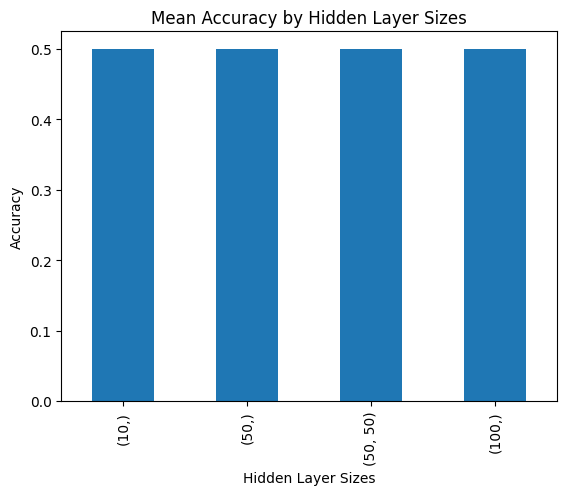

In [15]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Example hyperparameter grids
hidden_layer_sizes_list = [(10,), (50,), (100,), (50, 50)]
learning_rate_init_list = [0.1, 0.01, 0.001]
max_iter_list = [100, 200, 300]

results = []

for hls in hidden_layer_sizes_list:
    for lr_init in learning_rate_init_list:
        for max_it in max_iter_list:
            # Create and train the model
            neural_classifier = MLPClassifier(
                hidden_layer_sizes=hls,
                learning_rate_init=lr_init,
                max_iter=max_it,
                random_state=0
            )
            neural_classifier.fit(X_train, y_train)

            # Predict on test
            neural_predicted = neural_classifier.predict(X_test)
            accuracy = accuracy_score(y_test, neural_predicted)
            
            # Store the results
            results.append({
                'hidden_layer_sizes': hls,
                'learning_rate_init': lr_init,
                'max_iter': max_it,
                'accuracy': accuracy
            })

# Convert to DataFrame
df_results = pd.DataFrame(results)

# Print all results as a table
print(df_results)

# Print the best combination
best_result = df_results.loc[df_results['accuracy'].idxmax()]
print("\nBest hyperparameter combination:")
print(best_result)

# Optional: Plot mean accuracy by hidden_layer_sizes
fig = plt.figure()
df_results.groupby('hidden_layer_sizes')['accuracy'].mean().plot(kind='bar')
plt.title('Mean Accuracy by Hidden Layer Sizes')
plt.xlabel('Hidden Layer Sizes')
plt.ylabel('Accuracy')
plt.show()


Hyperparameters seem to not note have an effect on the accuracy of the model